In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
from numba import jit
@jit(nopython=True)
def mandelbrot(largeur, hauteur, max_iteration, xmin, xmax, ymin, ymax):
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1
    return mandelbrot_mat


Z = mandelbrot(500, 500, 100,  -2, 0.5, -1.25, 1.25)

<IPython.core.display.Javascript object>


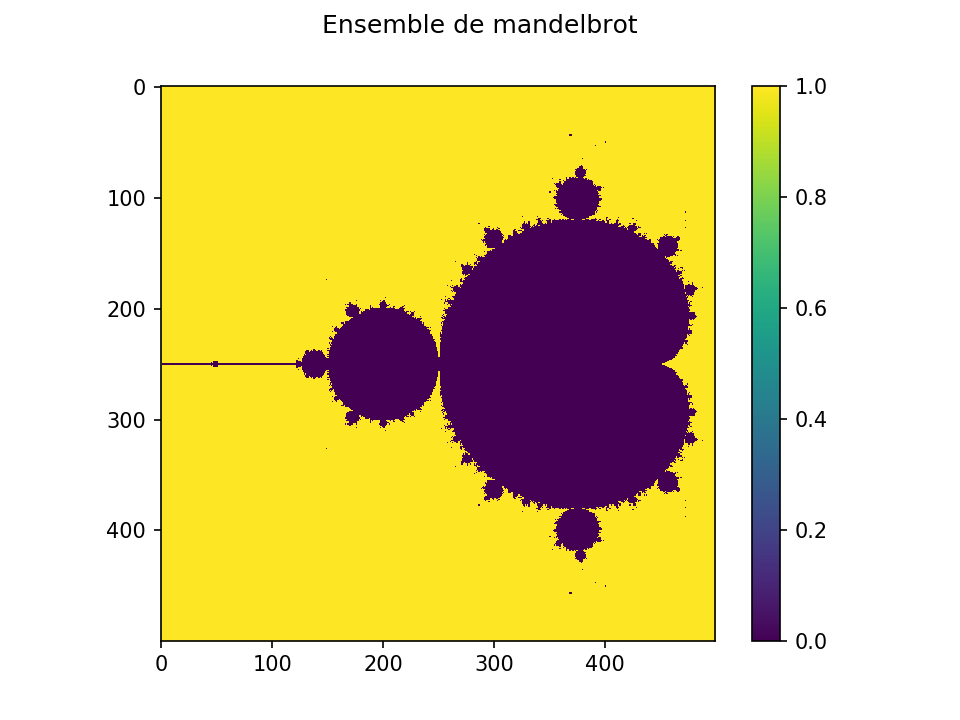

In [3]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle("Ensemble de mandelbrot")
im = plt.imshow(Z)
plt.colorbar()
plt.show()